In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from respondentCluster_utils import *

In [4]:
PROJECT_NAME   = '01_RespondentClust\\'
GENERIC_PATH   = 'C:\\Users\\GS-1931\\Desktop\\GIT_DESKTOP\\1_nlpClus\\'
KEY_PATH       =  GENERIC_PATH + '06_key_files\\'
DATA_FROM_PATH =  GENERIC_PATH + '\02_data_files\\' + PROJECT_NAME
DATA_TO_PATH   =  GENERIC_PATH + '02_data_files\\' + PROJECT_NAME
IMAGE_PATH     =  GENERIC_PATH + '03_image_files\\' + PROJECT_NAME
offset_path    = 'set_01\\'

In [5]:
icolList_meta = [col_ts, col_user]

meta_print = True
verbose    = True

make_plot = True
show_plot = True
save_plot = False
save_html = False

col_pk  = col_user
col_nlp = iCOLUMN_NLP

In [6]:
file_name = 'X_Sales_Enablement_Survey_v1.xlsx'
PATH = DATA_TO_PATH + file_name
X = pd.read_excel(io=PATH, sheet_name='State of Sales Enablement Surve')

X_raw = merge_ques_main( data=X )
#X[col_all_fques][0]

if(meta_print):
    print(X_raw.shape)
#X_raw.head(2)

(105, 16)


In [7]:
# get ff ques data
nTop_ques = 8
ilist_questions, ilist_freeformQues, ilist_freeformQues_fmt = get_ff_question_info( data=X_raw,  nTop_ques=nTop_ques, 
                                                                                    dict_ques_mapper=idict_ques_mapper, verbose=verbose)


__________________________________________________ get_ff_question_info __________________________________________________
num total ques        : 14
num freeform ques     : 8
num freeform_fmt ques : 8
len dict_ques_mapper  : 8


In [8]:
# initialize mappers
idict_topic_model_result = {}

idict_NC_mapper = {
    iques_1 : 3,
    iques_3 : -1,
    iques_4 : -1,
    iques_5 : -1
}

idict_SW_mapper = get_sw_mapper()   

idict_bigram_common_terms_mapper = get_bigram_common_terms_mapper()

idict_topic_name_mapper = get_topic_name_mapper()

idict_topN_kw_arr_mapper = get_dict_topN_kw_arr_mapper()

idict_hyperparam_mapper = get_topic_name_mapper()

In [9]:
#bigram_common_terms
#'ques3' in all_sw_ls
#'ques1' in all_sw_ls
#from respondentCluster_utils import *

In [10]:
#custom_sw = MANNUAL_STOP_WORDS + idict_SW_mapper[col_main]
#all_sw_ls = nlp_filter_stopwords( only_return_sw=True, use_nltk=True, use_spacy=True, custom_sw=custom_sw, X=None, col_nlp=None )
#len(all_sw_ls)

# Modelling

In [11]:
#idict_hyperparam_mapper[iques_1] = {'bigrm_min_count': 3, 'num_topic': 3, 'topN_kw': 20, 'result': 'kw=482, bigram=4, score=0.49'}
#idict_hyperparam_mapper[iques_2] = {'bigrm_min_count': 3, 'num_topic': 3, 'topN_kw': 20, 'result': 'kw=482, bigram=4, score=0.49'}

#idict_hyperparam_mapper[iques_3] = {'bigrm_min_count': 4, 'num_topic': 3, 'topN_kw': 16, 'result': 'kw=220, bigram=5, score=0.58'}
#idict_hyperparam_mapper[iques_4] = {'bigrm_min_count': 2, 'num_topic': 5, 'topN_kw': 18, 'result': 'kw=323, bigram=8,  score=0.55'}
#idict_hyperparam_mapper[iques_5] = {'bigrm_min_count': 12, 'num_topic': 5, 'topN_kw': 18, 'result': 'kw=387, bigram=0,  score=0.47'}
#idict_hyperparam_mapper[iques_6] = {'bigrm_min_count': 4, 'num_topic': 4, 'topN_kw': 20, 'result': 'kw=475, bigram=2,  score=0.42'}
#idict_hyperparam_mapper[iques_6] = {'bigrm_min_count': 4, 'num_topic': 4, 'topN_kw': 20, 'result': 'kw=475, bigram=2,  score=0.42'}
#idict_hyperparam_mapper[iques_7] = {'bigrm_min_count': 2, 'num_topic': 3, 'topN_kw': 12, 'result': 'kw=222, bigram=0,  score=0.45'}
#idict_hyperparam_mapper[iques_8] = "insufficient data, 16 docs, 106 kw(5 tfidf kw)"

col_main = iques_2


X_pp = generate_pp_data( data=X_raw, col_main=col_main, col_pk=col_pk, dict_ques_mapper=idict_ques_mapper )


bigram_common_terms = idict_bigram_common_terms_mapper[col_main] + ['-PRON-']
X_ml, all_sw_ls = generate_token_data_advance( data=X_pp, col_main=col_main, col_nlp=iCOLUMN_NLP, idict_SW_mapper=idict_SW_mapper, 
                                               punc_re=None, deacc=True, 
                                               use_nltk=True, use_spacy=True, enable_tag_filter=True, allowed_postags=iALLOWED_POSTAGS,
                                               bigram_common_terms=bigram_common_terms, bigrm_min_count=3, bigrm_threshold=0.1 )

#custom_sw = ['sale', 'sale_sale']
#X_ml, all_sw_ls = nlp_filter_stopwords( X=X_ml, col_nlp=col_nlp, use_nltk=True, use_spacy=True, custom_sw=custom_sw, only_return_sw=False )

#print(X.shape)
#X.head(2)

print_token_info( data=X_ml, col_nlp=col_nlp, num_bigram_print=-1 )

C:\Users\GS-1931\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\msgpack_numpy.py:184: DeprecationWarning:

encoding is deprecated, Use raw=False instead.

C:\Users\GS-1931\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\msgpack_numpy.py:184: DeprecationWarning:

encoding is deprecated, Use raw=False instead.



num docs        : 104
num unique kw   : 682
num bi-grams kw : 9

Bigarms: 
['increase_sale', 'sale_organization', 'client_experience', 'past_year', 'new_hire', 'coming_year', 'sale_team', 'sale_leader', 'customer_experience']


C:\Users\GS-1931\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\msgpack_numpy.py:184: DeprecationWarning:

encoding is deprecated, Use raw=False instead.

C:\Users\GS-1931\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\msgpack_numpy.py:184: DeprecationWarning:

encoding is deprecated, Use raw=False instead.



__________________________________________________ print_tfidf_info __________________________________________________
shape of tfidf_matrix    : (104, 242)
num text in tfidf_matrix : 242


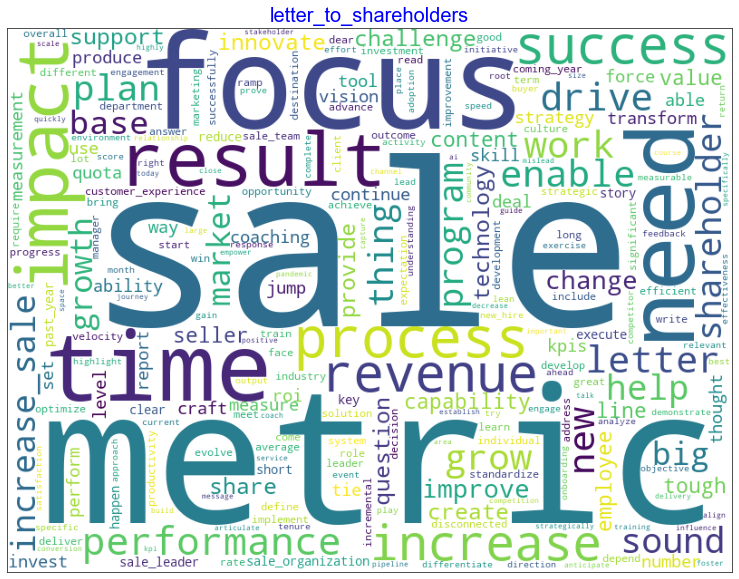

In [12]:
wc_obj_tfidf_vectorizer, wc_tfidf_matrix = get_tfidf_data_adv( data=X_ml, col_nlp=col_nlp, max_df=0.95, min_df=2, stop_words_tfidf=None )
print_tfidf_info(tfidf_matrix=wc_tfidf_matrix, obj_tfidf_vectorizer=wc_obj_tfidf_vectorizer, verbose=True)

if(make_plot):
    pass

make_word_cloud( obj_vectorizer=wc_obj_tfidf_vectorizer, data_tfidf=wc_tfidf_matrix, col_main=col_main,
                     only_neg_sent=False, X_sent=None, figsize=(16, 10),
                     offset_path=offset_path, im_path=IMAGE_PATH, save_plot=save_plot, show_plot=show_plot )

In [13]:
#X_ml.head(2)

In [14]:
docs, docs_token = X_ml[col_main].values.tolist(), X_ml[col_nlp].values.tolist()
id2word_dict, corpus = gensim_vectorizer( docs_token=docs_token, verbose=verbose )

__________________________________________________ gensim_vectorizer __________________________________________________
num docs in corpus       : 104
length of id2word_dict   : 242
1st item of corpus       : [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]]
1st item of corpus, text : [[('bring', 1), ('capability', 1), ('clear', 1), ('competition', 1), ('continue', 1), ('delivery', 1), ('development', 1), ('differentiate', 1), ('effort', 1), ('enable', 1), ('grow', 1), ('improve', 1), ('improvement', 1), ('increase', 1), ('key', 1), ('kpis', 1), ('market', 2), ('past_year', 1), ('sale', 1), ('share', 1), ('success', 1), ('understanding', 1), ('value', 1)]]


_____________________________________________ find_best_genism_lda_model _____________________________________________
ind: 0, num_topic:2, topN_kw; 20
ind: 1, num_topic:3, topN_kw; 20
ind: 2, num_topic:4, topN_kw; 20
ind: 3, num_topic:5, topN_kw; 18
ind: 4, num_topic:6, topN_kw; 18
ind: 5, num_topic:7, topN_kw; 18
ind: 6, num_topic:8, topN_kw; 16
ind: 7, num_topic:9, topN_kw; 16
ind: 8, num_topic:10, topN_kw; 16
best score             : 0.43
optimum num of cluster : 4


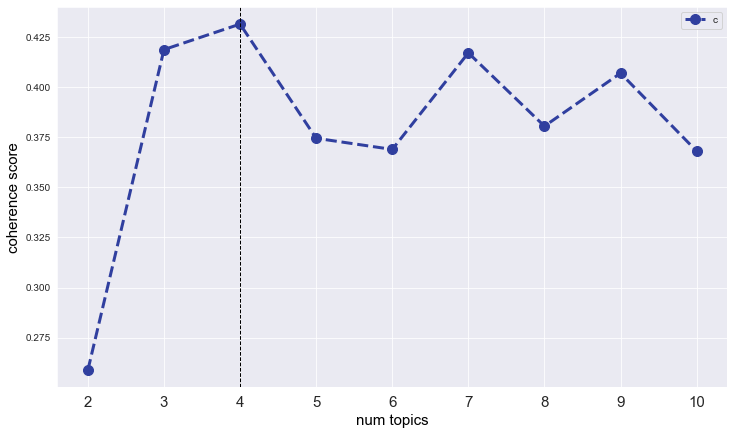

_____________________________________________ Modelling completed _____________________________________________
num topics      : 4
coherence score : 0.43 (topN_kw=12)


In [15]:
modelling_type = 'multiple' # single, multiple, load_exisitng
#modelling_type = 'single' # single, multiple, load_exisitng

verbose_temp   = True

topN_kw        = 12

num_topics = 3

MIN_TOPICS = 2
MAX_TOPICS = 6
STEP       = 1

topN_kw_arr = {2: 20, 3: 20, 4: 20, 5: 18, 6:18, 7: 18, 8:16, 9:16, 10:16}
#topN_kw_arr = None

#id2word_dict, docs_token, corpus
optimal_model, optimum_num_cluster, max_c_score = model_training_wrapper( num_topics=num_topics, modelling_type=modelling_type, 
                                                                          id2word_dict=id2word_dict, corpus=corpus, texts=docs_token, 
                                                                          start=MIN_TOPICS, limit=MAX_TOPICS, step=STEP, chunksize=20, passes=20, 
                                                                          topN_kw=topN_kw, topN_kw_arr=topN_kw_arr, verbose=verbose, 
                                                                          offset_path=offset_path, im_path=IMAGE_PATH, save_plot=save_plot, 
                                                                          show_plot=show_plot )
if topN_kw_arr is not None:
    topN_kw = topN_kw_arr[optimum_num_cluster]

In [26]:
topN_kw

20

In [27]:
# topic assigment
use_topic_name    = False

#dict_topic_mapper = None
dict_topic_mapper = idict_topic_name_mapper[col_main]

df_dominant_topic = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=docs, data_ml=X_ml, dict_topic_mapper=dict_topic_mapper, 
                                            topN_kw=topN_kw, verbose=verbose)
idict_topic_model_result[col_main] = df_dominant_topic
#df_dominant_topic.tail(2)

C:\Users\GS-1931\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\msgpack_numpy.py:184: DeprecationWarning:

encoding is deprecated, Use raw=False instead.

C:\Users\GS-1931\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\msgpack_numpy.py:184: DeprecationWarning:

encoding is deprecated, Use raw=False instead.

C:\Users\GS-1931\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\msgpack_numpy.py:184: DeprecationWarning:

encoding is deprecated, Use raw=False instead.

C:\Users\GS-1931\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\msgpack_numpy.py:184: DeprecationWarning:

encoding is deprecated, Use raw=False instead.

C:\Users\GS-1931\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\msgpack_numpy.py:184: DeprecationWarning:

encoding is deprecated, Use raw=False instead.

C:\Users\GS-1931\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\msgpack_numpy.py:184: DeprecationWa

__________________________________________________ format_topics_sentences __________________________________________________
df_dominant_topic shape : (104, 7)


In [28]:
#from respondentCluster_utils import *

### General Info

**Topic prevalence**
* fraction of users under each topic

In [29]:
#Finally, we want to understand the VOLUME and DISTRIBUTION of topics in order to judge how widely it was discussed. 
df_dominant_topic_stats = dominant_topic_stats( data=df_dominant_topic, use_topic_name=use_topic_name, verbose=verbose )
plot_percUserPerTopic(data=df_dominant_topic_stats, graph_width=1000, graph_height=450, col_main=col_main, limit_y_axis=[0,1],
                       offset_path=offset_path, im_path=IMAGE_PATH, save_plot=save_plot, show_plot=show_plot, save_html=save_html )


print some stats


**Top keywords**
* top keywords under each Topic, sorted by their weight

In [30]:
#num_words = 20
#print_gensim_lda_topics( model=optimal_model, num_words=num_words, verbose=True )
# top kw per topics
model = optimal_model
plot_spacy_topic_kws_simple(model=optimal_model, id2word_dict=id2word_dict, col_main=col_main, topN=topN_kw, 
                            use_topic_name=use_topic_name, dict_topic_mapper=dict_topic_mapper,
                            graph_width=1400, graph_height=650,
                            offset_path=offset_path, im_path=IMAGE_PATH, 
                            save_plot=save_plot, show_plot=show_plot, save_html=save_html )

### Statistical info

This graph shows the decorrelation of topics i.e how well separated or distinguishable are topic from each other.
* <span style="color:red">red color</span> : complete overlap, not favorable
* <span style="color:dark blue">dark blue</span> : 0 overlap, identified topics are of good quality

In [31]:
if( make_plot ):
    pass

mdiff, annotation = optimal_model.diff(optimal_model, distance='jaccard', num_words=topN_kw )
plot_ldaModel_difference_plotly(mdiff, annotation=annotation, col_main=col_main, 
                                use_topic_name=use_topic_name, dict_topic_mapper=dict_topic_mapper,
                                graph_width=800, graph_height=600,
                                offset_path=offset_path, im_path=IMAGE_PATH, save_plot=save_plot, show_plot=show_plot )

## **2D visualization of topics and associated top keywords**
* each circle denotes one topic
* ideally each topic must lie in a separate quadrant
* size of circle denotes prevalence of a topic (%user per topic)

**keyword plot**
* for a selected topic, topmost keyword is the most important
* blue bar shows overall term freq or in simple words overall importance
* red bar shows estimated term frequency within the selected topic

**How to view ?**
1. Look at the circles i.e topics
    * they must be well separated (ideally in opposite quadrants)
    * bigger circles are more prevalent
2. Click on the topic of interest
    * look at the keyword plot
    * topmost keywords are mostly responsible for the topic assignment
    * red bar should cover most of bar area in top keywords
    * keyword importance should drop sharply

In [32]:
obj_vis = show_pyLDAvis( model=optimal_model, corpus=corpus, id2word_dict=id2word_dict )
obj_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.189125  0.011207       1        1  44.446465
2      0.144390 -0.208451       2        1  25.458797
1     -0.112300 -0.004618       3        1  16.040697
0      0.157034  0.201862       4        1  14.054036, topic_info=             Term       Freq      Total Category  logprob  loglift
109      employee  14.000000  14.000000  Default  30.0000  30.0000
146         drive  16.000000  16.000000  Default  29.0000  29.0000
71        revenue  24.000000  24.000000  Default  28.0000  28.0000
217  satisfaction   9.000000   9.000000  Default  27.0000  27.0000
66          focus  18.000000  18.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
88           lead   3.157945   8.300703   Topic4  -3.8095   0.9958
82           role   0.985754   2.060312   Topic4  -4.9737   1.2251
66          focus   3.706422  18.143082   Topic4  -3.6493   0.3740
71        revenue   3.233345  24.197453   Topic4  -3.7859  -0.0505
13       increase   1.076892   7.986549   Topic4  -4.8853  -0.0414

[179 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
30        3  0.952707   ability
57        1  0.253176      able
57        2  0.759529      able
119       4  0.895748  activity
209       3  0.623121   address
...     ...       ...       ...
222       2  0.806941    vision
56        1  0.883074       way
128       4  0.893683       win
149       2  0.533040      work
149       3  0.533040      work

[162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

### smoke test of topic assignment
Below data shows:
1. top user response match for each topic
2. colored words are the keywords who matched with the assigned topic

In [33]:
#from respondentCluster_utils import *

In [35]:
topN_docs = 8
sentence_chunk_size = 30
num_kw_print = 20

top_topics_df = get_topN_topics( topic_df=df_dominant_topic, topN=topN_docs, verbose=verbose )

#nice_print_doc_topics( data=top_topics_df, col_main=col_main )
nice_print_doc_topics_colored( data=top_topics_df, col_main=col_main, use_topic_name=True, 
                               sentence_chunk_size=sentence_chunk_size, num_kw_print=num_kw_print )

__________________________________________________ get_topN_topics __________________________________________________
total records       : 29
num topics selected : 8
________________________________________________________________________________________________________________________________


Ques : letter_to_shareholders

Topic-0 : topic-0
['deal', 'win', 'rate', 'sale_leader', 'quota', 'outcome', 'provide', 'manager', 'clear', 'term', 'measurable', 'activity', 'deliver', 'focus', 'influence', 'stakeholder', 'feedback', 'line', 'close', 'kpi']


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________
Topic-1 : topic-1
['employee', 'satisfaction', 'need', 'impact', 'process', 'great', 'differentiate', 'score', 'try', 'lead', 'relationship', 'space', 'tool', 'include', 'time', 'work', 'ability', 'measure', 'increase', 'level']


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________
Topic-2 : topic-2
['revenue', 'drive', 'focus', 'customer_experience', 'new', 'enable', 'growth', 'sale_team', 'performance', 'capture', 'invest', 'content', 'shareholder', 'program', 'impact', 'support', 'vision', 'able', 'include', 'tie']


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________
Topic-3 : topic-3
['sale', 'result', 'metric', 'need', 'help', 'challenge', 'success', 'plan', 'value', 'change', 'thing', 'market', 'improve', 'seller', 'technology', 'strategy', 'use', 'create', 'way', 'kpis']


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________


In [25]:
0: 'marketing_reps/venture_capitalists/outcomes_and_efficiency',
1: 'high_qulatiy_growth_returns',
2: 'top_company_leaders/productivity_revenue'

SyntaxError: invalid syntax (<ipython-input-25-04c612f69632>, line 1)